In [1]:
import numpy as np

def func(x):
    return np.sin(2 * np.pi * x)


size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)


In [3]:
from sklearn.linear_model import BayesianRidge

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

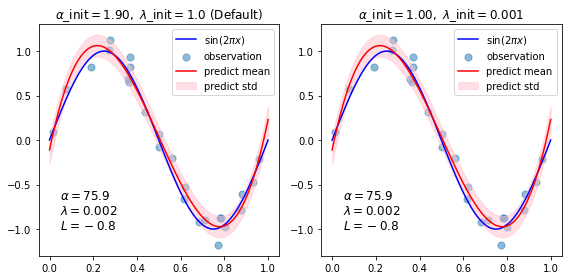

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

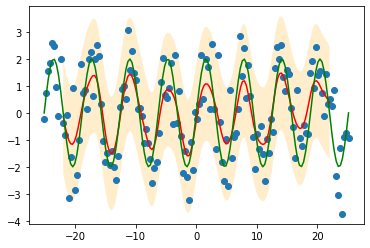

In [6]:
from pylab import *
n = 150

ns = 145

X = linspace(-8*pi, 8*pi, n)
S = 2*sin(X)
Y = S + randn(n)
F = linspace(-7*pi,7*pi,ns)

sig1 = 1.0
sig2 = 0.5
b = 0.5

def K(p,q):
  noise = 0
  if p == q:
    noise = sig1
  return sig2*exp(-b*(p-q)**2) + noise

def makeKmn(Xm,Xn):
  m = len(Xm)
  n = len(Xn)
  Kmn = matrix(zeros((m,n)))
  for i in range(n):
    for j in range(n):
      Kmn[i,j] = K(Xm[i],Xn[j])
  return Kmn

Koo = makeKmn(X,X)
Kos = makeKmn(X,F)
Kss = makeKmn(F,F)

YF = Kos.T * Koo.I * matrix(Y).T
YF = array(YF.T)[0]

VF = Kss - Kos.T * Koo.I * Kos
Vs = diag(VF)**(.5)

YFu = 1.96 * Vs + YF
YFl = -1.96 * Vs + YF

fill_between(F,YFu,y2=YFl,facecolor="orange",alpha=0.2)
scatter(X,Y)
plot(F,YF,color="r")
plot(X,S,color='g')
show()